# The Titanic Dataset

## Table of Contents

1. [**Introduction**](#1)
	- Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries
    - Reading in Data
    - Exploring Data
3. [**Data Cleaning**](#3)
4. [**Data Visualization**](#4)


# 1

## Introduction

### Project Description

In this project, my goal is to carry out a few Exploratory Data Analysis (EDA) on the `titanic dataset` and then prepare the data for machine learning by encoding categorical  variables. Also, I intend to carry out some basic vizualizations and provide reasons- who knows what insights I might find.

### Data Description

The dataset used in this project is the Titanic dataset, which contains information about passengers aboard the Titanic. This dataset is widely used for exploratory data analysis (EDA) and machine learning because it presents a mix of categorical and numerical data, missing values, and a well-known real-world scenario.

The dataset can be found [here](https://www.kaggle.com/datasets/markmedhat/titanic). 
You can also read more information about the data [here](https://www.kaggle.com/discussions/accomplishments/513587).

# 2

## Acquiring and Loading Data
### Library Import

Import all necessary Python library here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in Data
Import all necessary data here.

In [2]:
titanic_df = pd.read_csv("C:/Users/HP/Desktop/Building/Machine Learning/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring Data

#### Making a copy of the data to be encoded

In [3]:
encoded_df = titanic_df.copy()
# Keeping a copy of the data for encoding for machine learning

#### Dropping the `Name` column from the `encoded_df` because it is not useful

In [4]:
# Dropping the 'Name' column
encoded_df = encoded_df.drop(columns=['Name'])

# Displaying the updated DataFrame
encoded_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


#### Carrying out basic statistics on the data

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### it can be seen from the `.info()` method that the `Age` , `Embarked` and `Cabin` columns have missing values. I will use the `NAN()` method to confirm this 

In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3


## Data Cleaning

#### Handling missing values in the `titanic_df`

#### The `Embarked` column

In [8]:
# Fill missing values with mode dynamically
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [9]:
titanic_df['Embarked'].isnull().sum()

0

###### The result shows that the `Embarked` column no longer has missing values. This step is necessary to avoid errors when label encoding is being carried out.

#### The `Age` Column

I will be filling the missing values in the `Age` column with the mean value

In [10]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)  # Fill missing values

titanic_df['Age'].isnull().sum()  # Confirm if all missing values are filled

0

###### Since age is a continuous variable, replacing missing values with the mean (average) helps maintain a central tendency without introducing extreme values also making sure that we don’t distort the distribution significantly while preserving useful information.

## Answering Questions

### 1. Remove the names of the titanic column

I'll be dropping the `Name` column

In [10]:
# Dropping the 'Name' column
titanic_df = titanic_df.drop(columns=['Name'])

# Displaying the updated DataFrame
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### 2. Implement Label Encoding

I'll be using the `encoded_df`

Label encoding is used to convert categorical variables into numerical values. The columns that likely need label encoding are:

* Sex (`male`, `female`)
* Embarked (`C`, `Q`, `S`)

#### Handling the missing values in the `Embarked` column before encoding

In [11]:
# Fill missing values with mode dynamically
encoded_df['Embarked'].fillna(encoded_df['Embarked'].mode()[0], inplace=True)

###### We used the mode to fill missing values in the `Embarked` column because it is a categorical variable, and the mode represents the most frequently occurring value. This helps maintain the data distribution, avoid bias, and ensure consistency without introducing artificial values.

In [12]:
encoded_df['Embarked'].isnull().sum()

0

###### The result shows that the `Embarked` column no longer has missing values. This step is necessary to avoid errors when label encoding is being carried out.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply to categorical columns
encoded_df['Sex'] = label_encoder.fit_transform(encoded_df['Sex'])
encoded_df['Embarked'] = label_encoder.fit_transform(encoded_df['Embarked'])
encoded_df['Cabin'] = label_encoder.fit_transform(encoded_df['Cabin'])

# Check the updated dataset
encoded_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,1,35.0,0,0,373450,8.0500,147,2


#### checking the unique values for the ecoded columns

In [14]:
encoded_df['Sex'].value_counts()

# there are exactly 2 unique values

Sex
1    577
0    314
Name: count, dtype: int64

In [16]:
encoded_df['Embarked'].value_counts()

# there are exactly 3 unique values

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

### 3. Saving the encoded dataset

Exporting the encoded dataset as CSV 

In [17]:
encoded_df.to_csv('titanic_encoded.csv', index=False)
print("Encoded dataset saved successfully!")

Encoded dataset saved successfully!


# 4

## Data Visualization

### 1. Survival Rate by Gender

To show how survival chances differed between males and females.

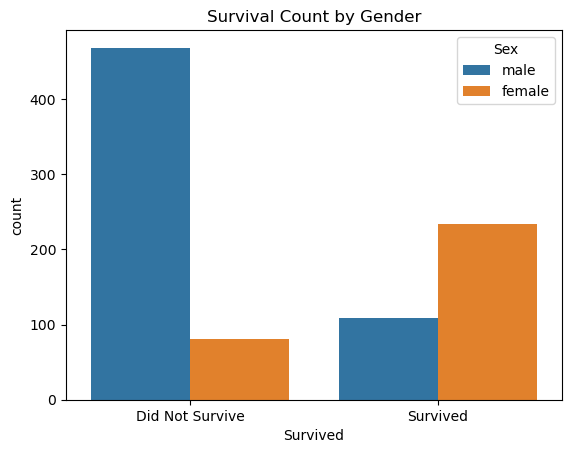

In [25]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')

# Adding custom legend to explain survival values
plt.legend(title='Sex', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])  # Renaming x-axis labels
plt.show()

#### Key Insights:

* More males died than survived:

    * The tallest blue bar (left side) shows that a large number of men did not survive.
    * The smaller blue bar on the right shows fewer men survived.

* More females survived than died:

    * The orange bar on the right (females who survived) is much higher than the one on the left (females who did not survive).
    * This supports the historical fact that women were given priority for lifeboats.

#### Conclusion:

* Females had a much higher survival rate than males.
* Males were more likely to die.
* This supports the **"Women and children first"** evacuation rule.

### 2. Passenger Class vs. Survival
To check if wealth (higher class) influenced survival chances.

__Where:__

1 = 1st Class

2 = 2nd Class

3 = 3rd Class

In [27]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

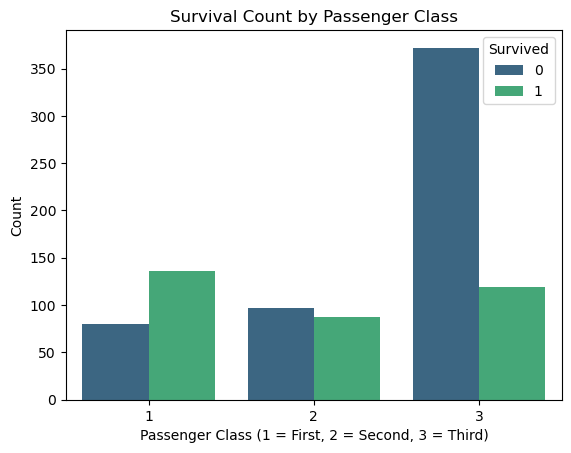

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Count')
plt.show()

#### Key Insights:

* **First-Class Passengers (`Pclass = 1`) had the highest survival rate.**
    * More green bars than blue in first class, meaning more people survived.

* **Third-Class Passengers (`Pclass = 3`) had the highest mortality.**
    * The largest dark blue bar appears here, showing the most deaths.

* **Second-Class Passengers (`Pclass = 2`) had a nearly equal survival and death rate.**
    * The green and blue bars are of similar height.

#### Conclusion:

* Higher-class passengers had a better survival rate, likely due to better access to lifeboats and prioritization during evacuation.
* Third-class passengers suffered the most fatalities, possibly due to lower access to exits and lifeboats.

### 3.  Age Distribution

This helps in understanding the age spread of passengers.

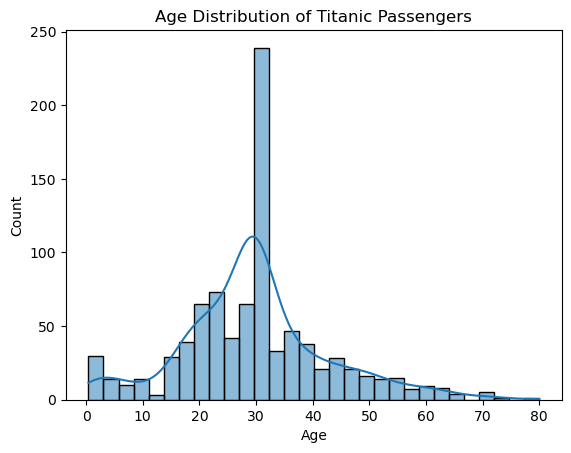

In [30]:
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Key Insights:

* Most passengers were between 20 and 40 years old, with a peak around 30 years old.
* There is a sharp spike at age 30, possibly due to data recording practices.
* The KDE curve (blue line) smooths out the histogram to show the overall trend.
* A right-skewed distribution suggests that younger passengers were more common than older ones.
* A small number of passengers were over 60 years old, with very few reaching 80.